## Does a magnet’s orientation affect its field strength reading?


In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 
import pathlib
import scipy.stats as stats

In [51]:
# DO NOT TOUCH THIS!! 
# This reads in all of the collected data and stores it as multiple 3D arrays.
datadir = pathlib.Path.cwd() / 'magnet-data'
filenames = []
for f in datadir.glob('*.csv'): filenames.append(f.stem)
# Create an empty list to store all positions.
test = []

pos = iter(sorted(datadir.glob('*.csv')))
# import all csv files from 'magnet-data'
for i in pos: 
    data = np.genfromtxt(i, delimiter=',')
    # Remove NaNs from data
    data = data[np.any(~np.isnan(data), axis=1)]
    # Change time to seconds
    data[:,0] /= 1000 
    # resize the data for 5 tests of data
    test.append(data)

In [75]:
def modelling(testnum, test):
    """
    Parameters
    ==========
    testnum : int
    test : list of 2d array-like

    Returns
    =======
    mean : array-like 
        the average value of `testnum` arrays

    chisq : array-like 
        the chi-squared value of `testnum` arrays at p-value = 1
    
    stdev : array-like 
        the standard deviation of `testnum` arrays
    
    """
    
    mean  = np.zeros(testnum, dtype='float')
    chisq = np.zeros(testnum, dtype='float')
    stdev = np.zeros(testnum, dtype='float')

    # First Position Raw Data
    for i in range(testnum):
        # assigning x and y for legibility.
        x = test[i][:,0]
        y = test[i][:,1]
        # Finding the mean value of the datasets and the chisquared values.
        mean[i] = np.mean(y)
        stdev[i] = np.std(y)
        chisq[i], p = stats.chisquare(y)
        # Plotting the data.
        fig = plt.figure(i, constrained_layout=True)
        plot = plt.errorbar(x, y, yerr=stdev[i] / np.sqrt(testnum), ecolor='k')
        # Calculating linear regression.
        m, b = np.polyfit(x, y, 1)
        plot = plt.plot(x, m * x + b)
        # Add title
        plt.title(filenames[i])

    
    return mean, stdev, chisq

chi-squared analysis:  [0.00319698 0.00163146 0.00170827 0.00133462 0.00207215] p-value = 1.0
mean of each position:  [1294.37937021 1294.60509227 1294.56086544 1294.69944621 1312.62315756]
standard deviation:  [0.22064362 0.15856881 0.16523328 0.14342457 0.18102627]
standard error:  [0.09867483 0.07091413 0.07389457 0.06414142 0.08095741]


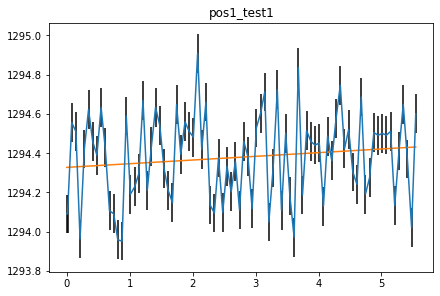

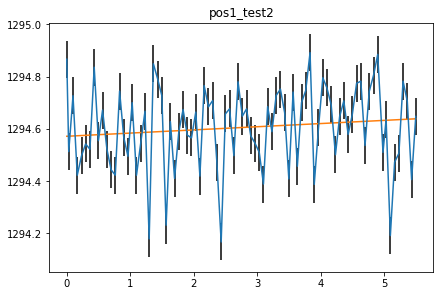

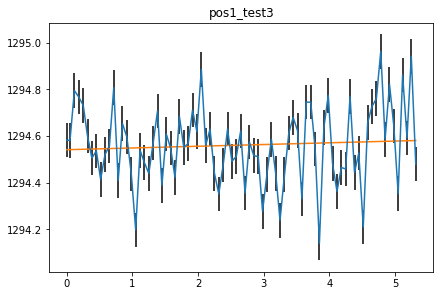

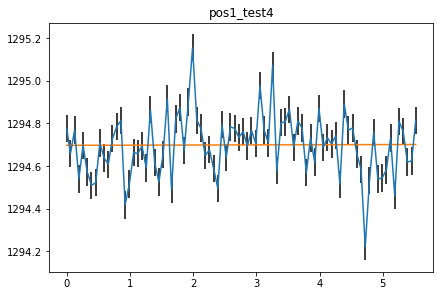

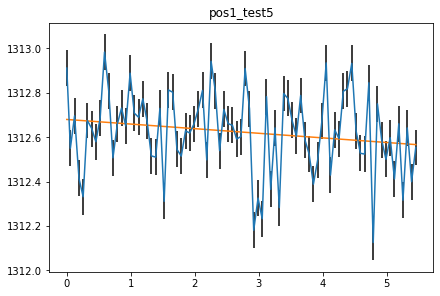

In [78]:
# Split the test array up into each position
pos1 = test[:5]
pos2 = test[5:10]
pos3 = test[10:15]
pos4 = test[15:20]

# Number of tests run
testnum = 5

mean, stdev, chisq = modelling(testnum, pos1)
# Looking at the first position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))


chi-squared analysis:  [0.0026485  0.00165151 0.00130054 0.00198298 0.00133577] p-value = 1.0
mean of each position:  [1522.72106005 1522.99505108 1523.24486501 1523.37318199 1523.53513137]
standard deviation:  [0.22043029 0.17304126 0.15357032 0.19193568 0.15658612]
standard error:  [0.09857942 0.07738641 0.06867874 0.08583624 0.07002744]


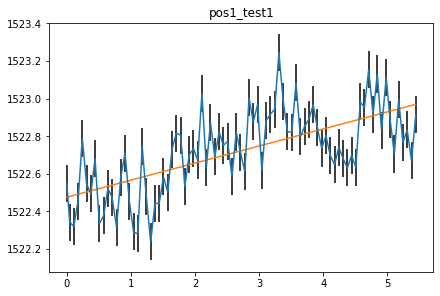

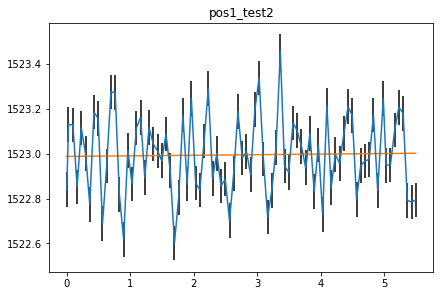

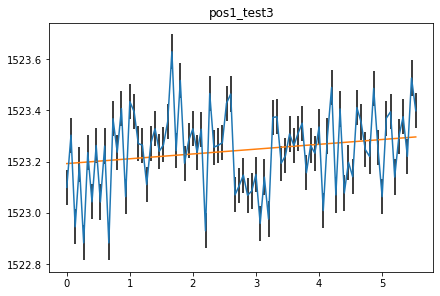

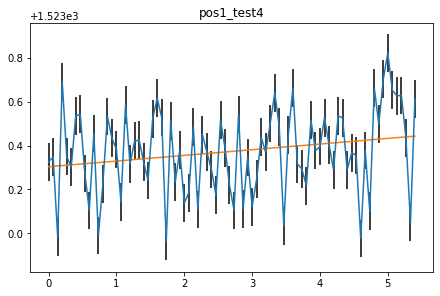

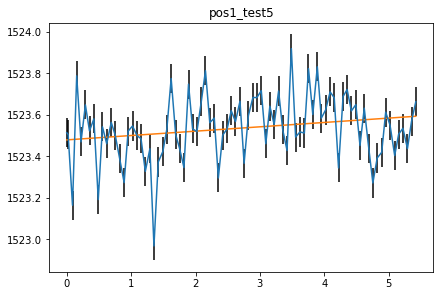

In [79]:
mean, stdev, chisq = modelling(testnum, pos2)
# Looking at the second position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))